# Unraveling the Unicorn Landscape: An Analysis of Billion-Dollar Startups for Strategic Investment

## Background 

My name is Fatima Abdullah (M00434618). This is my first Deep Leaning - Clustreing model assignment and is part of the CST4050 Assignment Project. I will be using tools like Python and Kaggle for dataset to complete the project and also use my knowledge that I learnt. Currently I am part of a VC / Startup Accelerator and we are investing in Saudi Arabia market actively as the economy is booming as per the reports - new link here -
I would be using dataset to understand what are some of the parameters that can be looked at of the unicorns and VCs who have invested in them to take help my venture team in taking investment decisions. 

## Our Goal

We can identify patterns and trends that reveal the trajectories of successful companies. These insights enable the firm to strategically allocate resources and identify emerging companies with the highest potential for future growth and return on investment.

## Overview
<a href="https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies/data"></a> Dataset includes Private companies with a valuation over $1 billion as of March 2022 and information on over 1,000 unicorn companies

Questions & following deliverables:

1. Industry distribution: Which industries are attracting the most investment?
2. Valuation ranges: How do valuations differ across clusters?
3. Which investors have funded the most unicorns?
4. Investor involvement: Which investors are most active in each cluster?
5. Funding patterns: How does funding correlate with valuation and growth stage within each cluster?
6. Which countries have the most unicorns? Are there any cities that appear to be industry hubs?
7. Which unicorn companies have had the biggest return on investment?

Further recommendation study
This is just related to the startups that are unicorn and we dont know many informations like what were their each funding round/, revenue generated, churn rate, market size, revenue model, & current traction
1. How long does it usually take for a company to become a unicorn? Has it always been this way?
4. Further addition can be on how much fund should be allocated.


Further Analysis:



| Field           | Description                                                                                     |
| --------------- | ----------------------------------------------------------------------------------------------- |
| Company         | Company name                                                                                     |
| Valuation       | Company valuation in billions (B) of dollars                                                 |
| Date Joined     | The date on which the company reached $1 billion in valuation                                 |
| Industry        | Company industry                                                                                  |
| City            | City the company was founded in                                                               |
| Country         | Country the company was founded in                                                             |
| Continent       | Continent the company was founded in                                                            |
| Year Founded    | Year the company was founded                                                                   |
| Funding         | Total amount raised across all funding rounds in billions (B) or millions (M) of dollars       |
| Select Investors | Top 4 investing firms or individual investors (some have less than 4)                           |


## Step 1 : Reading and Understanding Data

In [2]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
filename = "/Users/fatimaabdullah93/Desktop/MDX Masters - Data Science/CST4050 Modelling, regression and Machine Learning/Assignment 03/Clustering/Unicorn_Companies.csv"
df = pd.read_csv(filename)


In [5]:
def bar_custom(current, total, width=100):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))


# Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f"/kaggle/input/unicorn-companies/Unicorn_Companies.csv{filename}"
    try:
        import os

        if filename not in os.listdir():
            !pip3 install wget
            import wget

            downloaded_filename = wget.download(url)
            print(f"{downloaded_filename} file downloaded", bar=bar_custom)
        else:
            print(f"{filename} already exists")
        return pd.read_csv(filename, **kwargs)

    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

In [6]:

df.head(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [7]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [8]:
# df description
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


Observation:

The minimum value in the Year Founded column is 1919. This means that this dataset does not contain data on unicorn companies founded before 1919.

The maximum value in the Year Founded column is 2021. This means that this dataset does not include data on unicorn companies founded after 2021.

## Step 2 : Data Cleansing

Pick 4 independent and 1 depend variable

Explain data

Do data cleaning
Data featuring, data standardization
If outliner then remove

EDA - plot below

Calculate correlation

Multicorrelateion graph - here do the correlation 
Hirecahry clustering - can be used for grouping too
PCA - we hope for super feature if there are similar features

Then do multicorelation and see what you theory is
Next do the PCA and standardized the value
Plot Hirecahry graph

Run the model 
Elbow model
Box plot for closeting by group - by group is best method

Conclusion
After that in the end do the each clusters mean, median and standard deviation
Conclude how each cluster problem you are solving
Explain what your each startups and if you can label it in the graph its good - Generate with label results(graph) for clarity
Improvements how mention in the end
//// have i missed any and show me formulas and just code of how this can be done

In [9]:
# Calculating the Missing Values % contribution in retail df
df_null = round(100 * (df.isnull().sum()) / len(df), 2)
df_null

Company             0.00
Valuation           0.00
Date Joined         0.00
Industry            0.00
City                1.49
Country             0.00
Continent           0.00
Year Founded        0.00
Funding             0.00
Select Investors    0.09
dtype: float64

In [10]:
# Convert to Date Joined to proper datatype datetime

df["Date Joined"] = pd.to_datetime(df["Date Joined"])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [11]:
# Creating a 'Year Joined' column.
# The Date Joined column does not just have year—it has the year, month, and date. I need to extract the year component from the Date Joined column and add those year components into a new column to keep track of each company's year joined 

df["Year Joined"] = df["Date Joined"].dt.year
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [12]:
#checking column Industry if its unique or not
df['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery', 'Consumer & retail',
       'Data management & analytics', 'Edtech', 'Health', 'Hardware',
       'Auto & transportation', 'Travel', 'Cybersecurity',
       'Mobile & telecommunications', 'Artificial Intelligence'],
      dtype=object)

There's an issue with the current categories: 'Artificial intelligence' and 'Artificial Intelligence' are duplicates. I'll create a dictionary to easily fix this. Dictionaries are great because you can store many replacements and apply them efficiently with a single line of code.

In [13]:
replacement_dict = {
    'Artificial Intelligence': 'Artificial intelligence',
   
}

df['Industry'] = df['Industry'].replace(replacement_dict)

df['Industry'].unique()
df['Industry'].value_counts()


Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Artificial intelligence                 84
Health                                  74
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Name: Industry, dtype: int64

In [14]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [15]:
#count number of rows and columns in the dataset

df.shape

(1074, 11)

In [45]:
#check if country is unique or not

df['Country'].unique()

#count values of country
df['Country'].value_counts()

United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Chile                     2
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Argentina           

## Step 3 : EDA - Data Preparation/PreProcessing

#### We are going to analyze the unicorns based on below various factors:

- Top 20 countries with highest number of unicorns valuation
- Top Investors
- Top valuations against investment raised
- Turned unicron over years

In [17]:
#split investors just for more clarity and deep analysis on investors

df[['inv1','inv2','inv3','inv4']] = df['Select Investors'].str.split(',', expand=True)
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,inv1,inv2,inv3,inv4
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,Khosla Ventures,LowercaseCapital,capitalG,None
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017,K2 Ventures,Matrix Partners China,IDG Capital,None
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017,58.com,Tencent Holdings,None,None
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021,Xingwang Investment Management,China Capital Investment Group,Matrix Partners China,None
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021,IAG Capital Partners,Augmentum Fintech,Northzone Ventures,None


### Find out Years it took for a startup to turn unicorn

In [18]:
df['Years To Unicorn'] = df['Date Joined'].dt.year - df['Year Founded']
df['Years To Unicorn'].describe()

count    1074.000000
mean        7.000931
std         5.329672
min        -4.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

Key Insights:

The minimum value is -4, which is illogical for companies to achieve unicorn status with negative values. Therefore, we need to isolate all rows where the 'Years to Unicorn' column contains a negative value.

In [19]:
# Filter the dataframe to include only rows where 'Years to Unicorn' is greater than or equal to 0
df[df['Years To Unicorn'] < 0]


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,inv1,inv2,inv3,inv4,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",2017,Phoenix New Media,Tianjin Haihe Industry Fund,None,None,-4


Only one company, Yidian Zixun, has a negative value in the "Year To Join" column.

After verifying on the company's website, we found that it was founded in 2013. Instead of removing this company from the dataset, we can correct the "Year Founded" value from 2021 to 2013.

In [20]:
# Replace Yidian Zixun's `Year Founded` value with 2011

df.loc[df['Company']=='Yidian Zixun', 'Year Founded'] = 2013

# Verify the change was made properly

df[df['Company']=='Yidian Zixun']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,inv1,inv2,inv3,inv4,Years To Unicorn
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2013,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund",2017,Phoenix New Media,Tianjin Haihe Industry Fund,None,None,-4


In [21]:
# Recalculate all values in the `Years To Unicorn` column

df['Years To Unicorn'] = df['Year Joined'] - df['Year Founded']

# Verify that there are no more negative values in the column

df['Years To Unicorn'].describe()

count    1074.000000
mean        7.008380
std         5.319864
min         0.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years To Unicorn, dtype: float64

In [22]:
df.dtypes


Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Year Joined                  int64
inv1                        object
inv2                        object
inv3                        object
inv4                        object
Years To Unicorn             int64
dtype: object

### Convert Valuation datatype from String to Int and also remove B & $

In [29]:
def str_to_num(value):
    """Converts a string with '$B' symbols to an integer."""
    # Remove leading and trailing '$B' characters from the string
    value = value.replace('$', '').replace('B', '')
    # Convert the modified string to an integer
    num_value = int(value)
    return num_value

# Apply the function and create a new 'Valuation number' column
df['Valuation_num'] = df['Valuation'].apply(str_to_num)

In [30]:
# Display the original 'Valuation' and the new 'valuation_num' columns for the first few rows
df[['Valuation', 'Valuation_num']].head()

,Valuation,Valuation_num
0,$180B,180
1,$100B,100
2,$100B,100
3,$95B,95
4,$46B,46


### To assess valuation relative to the dataset, a "High Valuation" column will be created. This column will classify companies as "low" or "high" based on whether their valuation falls below or above the median valuation, respectively.

In [31]:
# Createte new ' High Valuation' column

# Use qcut to divide Valuation into 'high' 'medium' and 'low' Valuation groups
df['High Valuation'] = pd.cut(df['Valuation_num'], bins=[0, 50, 100, np.inf], labels=['low', 'medium', 'high'])

df.head(10)



,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,inv1,inv2,inv3,inv4,Years To Unicorn,Valuation_num,High Valuation
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,5,180,high
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None,10,100,medium
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None,10,100,medium
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,Khosla Ventures,LowercaseCapital,capitalG,None,4,95,medium
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None,6,46,low
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,Sequoia Capital China,Blackbird Ventures,Matrix Partners,None,6,40,low
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019,Tiger Global Management,Insight Partners,DST Global,None,7,40,low
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014,Khosla Ventures,Kleiner Perkins Caufield & Byers,Collaborative Fund,None,2,39,low
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017,Tiger Global Management,None,None,None,2,38,low
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019,Andreessen Horowitz,New Enterprise Associates,Battery Ventures,None,6,38,low


In [32]:
# Rank the continents by number of unicorn companies

df['Continent'].value_counts()

North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: Continent, dtype: int64

## Top 20 countries with highest unicorns

/var/folders/xn/663bz7bn6x90svlgcl1kc28r0000gn/T/ipykernel_8666/2506421370.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df.head(20),


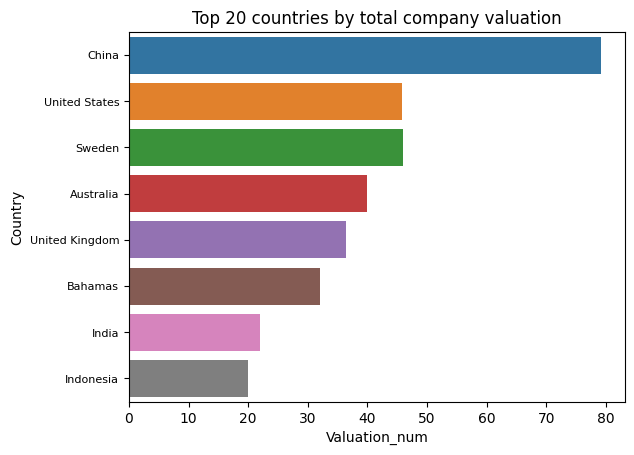

In [33]:
# Create a barplot for the top 20 countries

sns.barplot(data=df.head(20),
            y='Country',
            x='Valuation_num', ci=None)
plt.title('Top 20 countries by total company valuation')
plt.yticks(fontsize=8)
plt.show();



In [34]:

top_10_investors = df['Select Investors'].value_counts().head(10)
print(top_10_investors)

Sequoia Capital                                                                                3
Pelion Venture Partners, Foundation Capital, Thoma Bravo                                       2
Insight Partners, Sequoia Capital, Index Ventures                                              2
Speedinvest, Valar Ventures, Uniqa Ventures                                                    2
SoftBank Group                                                                                 2
Shunwei Capital Partners, China Media Group, Guangzhou Huiyin Aofeng Equity Investment Fund    2
General Atlantic                                                                               2
Qualcomm Ventures, Accel, Canaan Partners                                                      2
Sequoia Capital China, Qiming Venture Partners, Tencent Holdings                               2
Global Founders Capital, Shea Ventures, Greycroft                                              2
Name: Select Investors, dtype:

### Duration to turn Unicorn startup

In [35]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,inv1,inv2,inv3,inv4,Years To Unicorn,Valuation_num,High Valuation
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,5,180,high
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None,10,100,medium
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None,10,100,medium
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,Khosla Ventures,LowercaseCapital,capitalG,None,4,95,medium
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None,6,46,low


In [36]:
# Create a column representing company valuation as numeric data
df['Valuation_Num'] = df['Valuation'].str.replace('$', '').str.replace('B', '').astype(int)

companies_group_val = (df[["Industry", "Valuation_Num"]]
           .groupby("Industry")
           .max()
           .sort_values(by="Valuation_Num")
          )
companies_group_val

/var/folders/xn/663bz7bn6x90svlgcl1kc28r0000gn/T/ipykernel_8666/1726672465.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation_Num'] = df['Valuation'].str.replace('$', '').str.replace('B', '').astype(int)


,Valuation_Num
Industry,
Cybersecurity,9
Mobile & telecommunications,9
Travel,10
Auto & transportation,11
Hardware,12
Health,13
Edtech,22
Consumer & retail,38
Data management & analytics,38


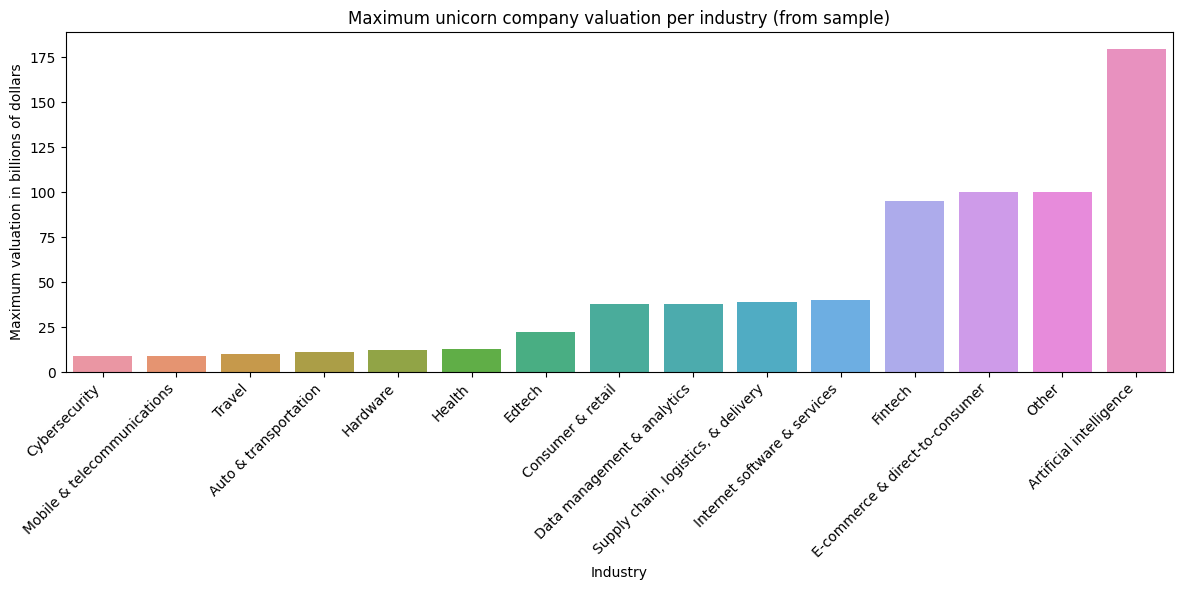

In [38]:
# Create bar plot
# with Industry column as the categories of the bars
# and new valuation column as the heights of the bars

plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
sns.barplot(x=companies_group_val.index, y=companies_group_val['Valuation_Num'])
plt.title("Maximum unicorn company valuation per industry (from sample)")
plt.xlabel("Industry")
plt.ylabel("Maximum valuation in billions of dollars")
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()  # Adjust the spacing between the plot elements
plt.show()

In [39]:
df['Funding_num'] = df['Funding'].replace('Unknown', float('nan')).str.replace('$', '').str.replace('B', 'e9').str.replace('M', 'e6').str.replace('e9', '000000000').str.replace('e6', '000000').astype(float).astype(float)

print(df['Funding_num'])


0       8.000000e+09
1       7.000000e+09
2       2.000000e+09
3       2.000000e+09
4       4.000000e+09
            ...     
1069    3.790000e+08
1070    9.900000e+08
1071    8.000000e+07
1072    7.920000e+08
1073    6.200000e+08
Name: Funding_num, Length: 1074, dtype: float64


/var/folders/xn/663bz7bn6x90svlgcl1kc28r0000gn/T/ipykernel_8666/1610830382.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Funding_num'] = df['Funding'].replace('Unknown', float('nan')).str.replace('$', '').str.replace('B', 'e9').str.replace('M', 'e6').str.replace('e9', '000000000').str.replace('e6', '000000').astype(float).astype(float)


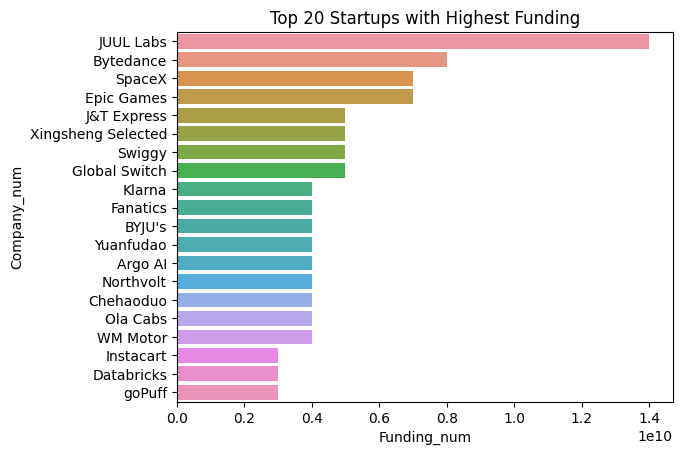

In [40]:


# Filter the dataframe to include only the top 5 startups with highest funding
top_startups = df.nlargest(20, 'Funding_num')

# Plot the graph
sns.barplot(x='Funding_num', y='Company', data=top_startups)
plt.xlabel('Funding_num')
plt.ylabel('Company_num')
plt.title('Top 20 Startups with Highest Funding')
plt.show()

In [41]:
import plotly.express as px

# Filter the dataframe to include only companies that became unicorns after 2020
filtered_df = df[df['Year Joined'] > 2020]

# Create the valuation map
fig = px.scatter_geo(filtered_df,
                     locations='Country',
                     locationmode='country names',
                     color='Valuation',
                     hover_name='Company',
                     title='Global Valuation Map of Unicorns after 2020')

fig.show()

In [42]:
df.head(5)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,inv1,inv2,inv3,inv4,Years To Unicorn,Valuation_num,High Valuation,Valuation_Num,Funding_num
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,5,180,high,180,8.000000e+09
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None,10,100,medium,100,7.000000e+09
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None,10,100,medium,100,2.000000e+09
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,Khosla Ventures,LowercaseCapital,capitalG,None,4,95,medium,95,2.000000e+09
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None,6,46,low,46,4.000000e+09


### Independent Variable (Target): Valuation_num
### Dependent Variables (Features): Funding_num, Years To Unicorn, Year Founded, Year Joined

## Standarized the data & Calculate Correlation

In [100]:
df.corr()

/var/folders/xn/663bz7bn6x90svlgcl1kc28r0000gn/T/ipykernel_7320/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year Founded,Year Joined,Years To Unicorn,Valuation_num,Valuation_Num,Funding_num
Year Founded,1.000000,0.356191,-0.936181,-0.074089,-0.074089,-0.079992
Year Joined,0.356191,1.000000,-0.004996,-0.219981,-0.219981,-0.291847
Years To Unicorn,-0.936181,-0.004996,1.000000,-0.003466,-0.003466,-0.022688
Valuation_num,-0.074089,-0.219981,-0.003466,1.000000,1.000000,0.598384
Valuation_Num,-0.074089,-0.219981,-0.003466,1.000000,1.000000,0.598384
Funding_num,-0.079992,-0.291847,-0.022688,0.598384,0.598384,1.000000


/var/folders/xn/663bz7bn6x90svlgcl1kc28r0000gn/T/ipykernel_7320/2975651719.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



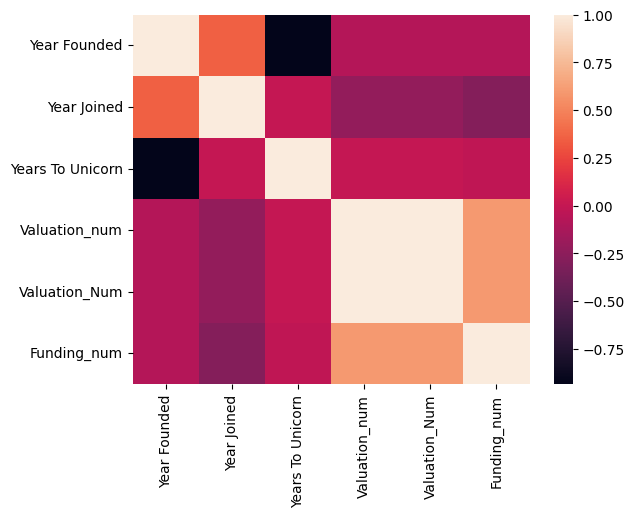

In [101]:
sns.heatmap(df.corr())
plt.show()

In [117]:



# Selecting numerical features for clustering
# Check for missing or infinite values in numeric_features
print(numeric_features.isnull().sum())
print(numeric_features.isin([np.inf, -np.inf]).sum())

# Replace missing or infinite values with appropriate values or drop the rows
numeric_features = numeric_features.replace([np.inf, -np.inf], np.nan).dropna()



//////        delete .....





Funding_num         0
Years To Unicorn    0
Year Founded        0
Year Joined         0
dtype: int64
Funding_num         0
Years To Unicorn    0
Year Founded        0
Year Joined         0
dtype: int64


In [118]:
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,inv1,inv2,inv3,inv4,Years To Unicorn,Valuation_num,High Valuation,Valuation_Num,Funding_num
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,5,180,high,180,8.000000e+09
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None,10,100,high,100,7.000000e+09
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None,10,100,high,100,2.000000e+09
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,Khosla Ventures,LowercaseCapital,capitalG,None,4,95,high,95,2.000000e+09
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,Institutional Venture Partners,Sequoia Capital,General Atlantic,None,6,46,high,46,4.000000e+09


## Plot hierarchical clustering graph

In [121]:
# Selecting numerical features for clustering
numeric_features = df.select_dtypes(include=[np.number])

# Perform the linkage using the numeric dataframe
mergings = linkage(numeric_df, method="ward")

# Plot the dendrogram
plt.figure(figsize=(20, 10))


dendrogram(mergings)
plt.title('Dendrogram')
plt.show()


NameError: name 'numeric_df' is not defined

## Peform PCA

In [119]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=4)

# Fit the PCA model to the standardized data
pca.fit(standardized_data)

# Transform the data to the principal components
principal_components = pca.transform(standardized_data)

# Create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', ])

ValueError: could not convert string to float: 'Year Founded'

<a id="4"></a> <br>
## Step 4 : Building the Model

### K-Means Clustering

K-means clustering is one of the simplest and most popular unsupervised machine learning algorithms

### Finding the Optimal Number of Clusters

#### Elbow Curve to get the correct number of Clusters
A fundamental step for any unsupervised algorithm is determining the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to decide this optimal value of k.

In [123]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Assuming you have the standardized data stored in 'standardized_data'
inertia_list = []

# Define the range of number of clusters to try
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# Run K-means for each number of clusters and store the inertia value
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(standardized_data)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow diagram
plt.plot(range_n_clusters, inertia_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Diagram')
plt.show()

ValueError: could not convert string to float: 'Year Founded'

In [124]:
# Define the number of clusters
n_clusters = 3

# Create an instance of the KMeans class
kmeans = KMeans(n_clusters=n_clusters)
df_encoded = ...

# Fit the KMeans model on the encoded dataframe
kmeans.fit(df_encoded)


TypeError: float() argument must be a string or a real number, not 'ellipsis'

ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

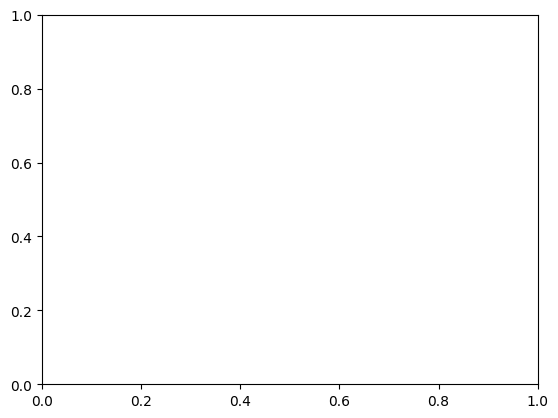

In [125]:
# plot the inertia_list value for each n_clusters
plt.plot(range_n_clusters, inertia_list)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [24]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_list = []

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    silhouette_list.append(silhouette_avg)
    print(
        "For n_clusters={0}, the silhouette score is {1}".format(
            num_clusters, silhouette_avg
        )
    )

/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.5415858652525395


/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.5084896296141937


/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.4814786837400833


/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.46627005641897035


/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.41760634878151304


/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.4159203051748714


/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.4077843741366132


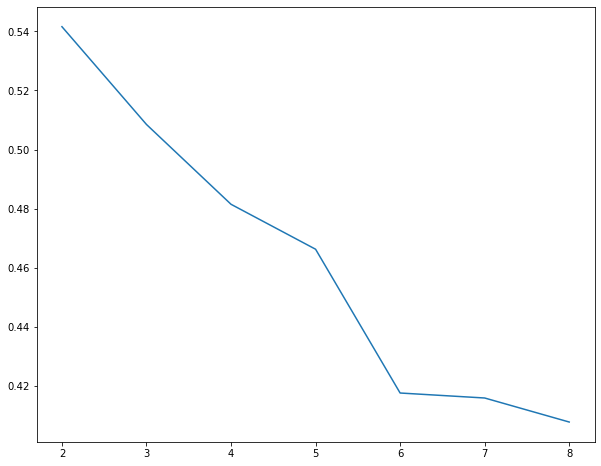

In [25]:
plt.plot(range_n_clusters, silhouette_list)

In [26]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

/home/ivan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [27]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [28]:
# assign the label
rfm["Cluster_label_kmeans"] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_label_kmeans
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2


<AxesSubplot:xlabel='Cluster_label_kmeans', ylabel='Amount'>

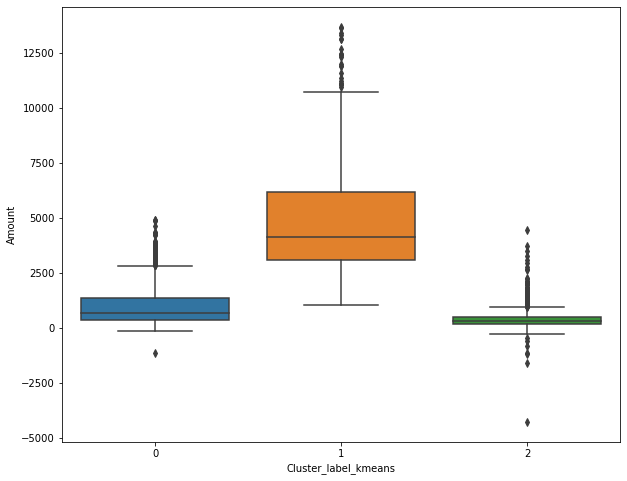

In [29]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x="Cluster_label_kmeans", y="Amount", data=rfm)

<AxesSubplot:xlabel='Cluster_label_kmeans', ylabel='Frequency'>

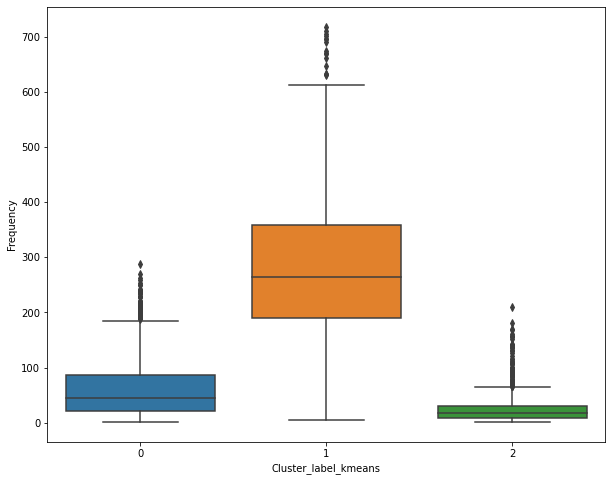

In [30]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x="Cluster_label_kmeans", y="Frequency", data=rfm)

<AxesSubplot:xlabel='Cluster_label_kmeans', ylabel='Recency'>

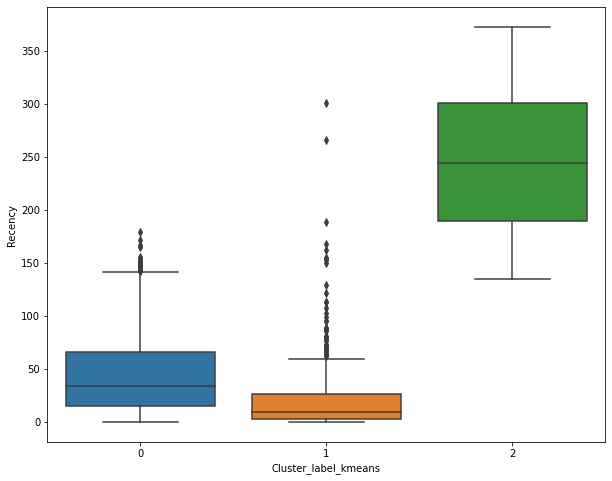

In [31]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x="Cluster_label_kmeans", y="Recency", data=rfm)

### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy.

In [32]:
mergings = linkage(rfm_df_scaled, method="complete", metric="euclidean")

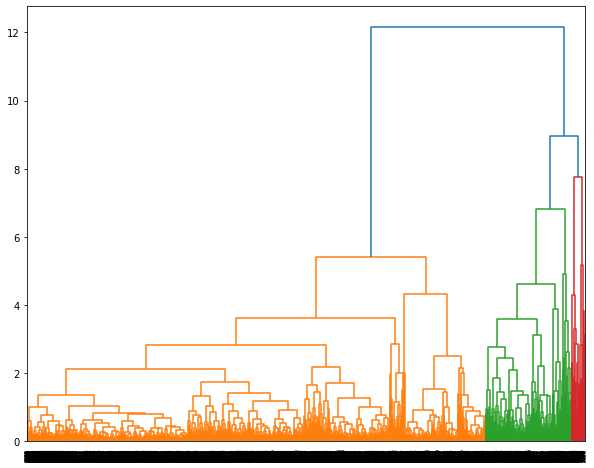

In [33]:
dendrogram(mergings)
plt.show()

<i>Read more about linkages: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html<i>

#### Cutting the Dendrogram based on K

In [34]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(
    -1,
)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [35]:
# Assign cluster labels
rfm["Cluster_label_hier"] = cluster_labels
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_label_kmeans,Cluster_label_hier
0,12346.0,0.00,2,325,2,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,0


<AxesSubplot:xlabel='Cluster_label_hier', ylabel='Amount'>

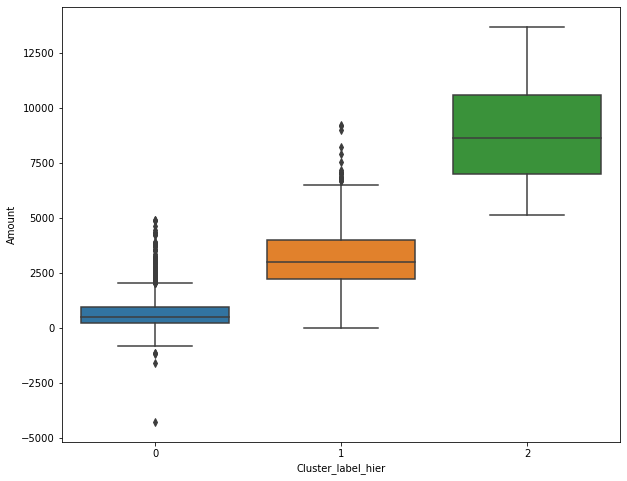

In [36]:
# Plot Cluster Id vs Amount
sns.boxplot(x="Cluster_label_hier", y="Amount", data=rfm)

<AxesSubplot:xlabel='Cluster_label_hier', ylabel='Frequency'>

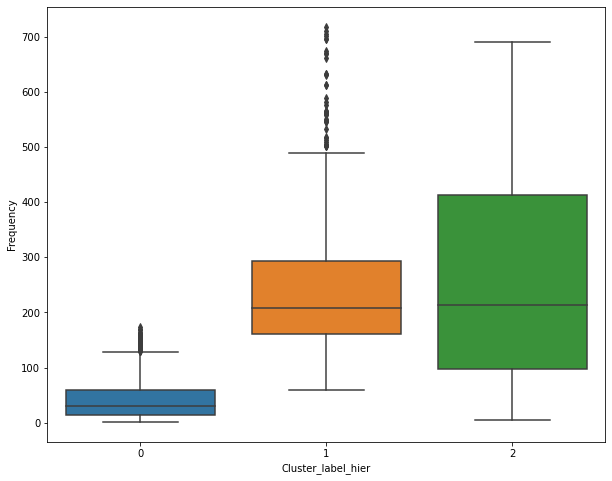

In [37]:
# Plot Cluster Id vs Frequency
sns.boxplot(x="Cluster_label_hier", y="Frequency", data=rfm)

<AxesSubplot:xlabel='Cluster_label_hier', ylabel='Recency'>

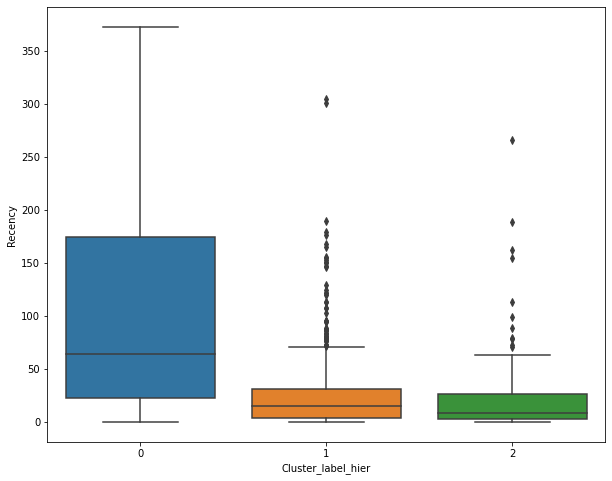

In [38]:
# Plot Cluster Id vs Recency
sns.boxplot(x="Cluster_label_hier", y="Recency", data=rfm)

### Gaussian Mixture Models

In [39]:
# training gaussian mixture model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(rfm_df_scaled)

labels = gmm.predict(rfm_df_scaled)

In [40]:
rfm["Cluster_label_gmm"] = labels

- Think of insights that you might get ftom GMM, similar to K-Means and hierarchical clustering.
- What if we change the number of clusters to 7 (for all 3 methods).

### DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
clustering = DBSCAN(eps=1, min_samples=2).fit(rfm_df_scaled)
rfm["Cluster_label_dbscan"] = clustering.labels_

In [43]:
rfm

,CustomerID,Amount,Frequency,Recency,Cluster_label_kmeans,Cluster_label_hier,Cluster_label_gmm,Cluster_label_dbscan
0,12346.0,0.00,2,325,2,0,2,0
1,12347.0,4310.00,182,1,1,1,1,0
2,12348.0,1797.24,31,74,0,0,0,0
3,12349.0,1757.55,73,18,0,0,0,0
4,12350.0,334.40,17,309,2,0,2,0
...,...,...,...,...,...,...,...,...
4366,18278.0,173.90,9,73,0,0,2,0
4367,18280.0,180.60,10,277,2,0,2,0
4368,18281.0,80.82,7,180,2,0,2,0
4369,18282.0,176.60,13,7,0,0,2,0


## Step 5 : Final Analysis

<AxesSubplot:xlabel='Cluster_label_hier', ylabel='Cluster_label_kmeans'>

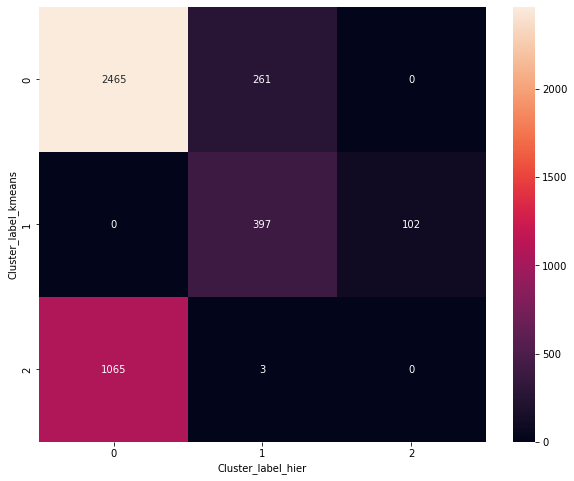

In [44]:
sns.heatmap(
    pd.crosstab(rfm["Cluster_label_kmeans"], rfm["Cluster_label_hier"]),
    annot=True,
    fmt="d",
)

Text(0, 0.5, 'Recency')

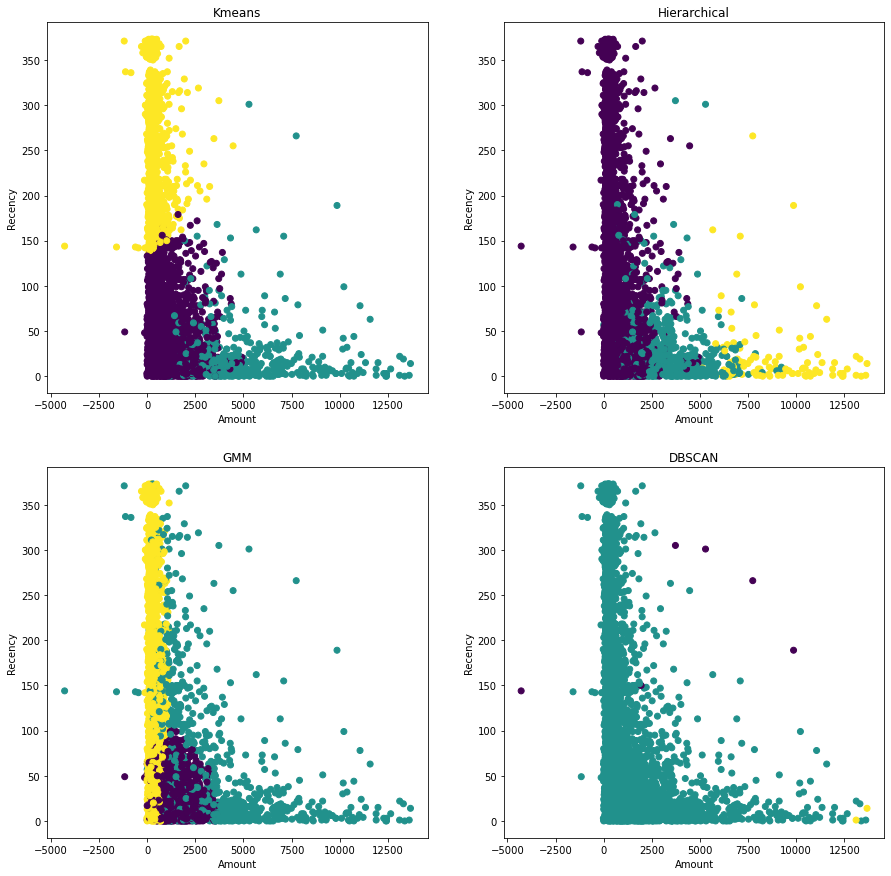

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].scatter(rfm["Amount"], rfm["Recency"], c=rfm["Cluster_label_kmeans"])
ax[0, 1].scatter(rfm["Amount"], rfm["Recency"], c=rfm["Cluster_label_hier"])
ax[1, 0].scatter(rfm["Amount"], rfm["Recency"], c=rfm["Cluster_label_gmm"])
ax[1, 1].scatter(rfm["Amount"], rfm["Recency"], c=rfm["Cluster_label_dbscan"])

ax[0, 0].title.set_text("Kmeans")
ax[0, 1].title.set_text("Hierarchical")
ax[1, 0].title.set_text("GMM")
ax[1, 1].title.set_text("DBSCAN")


ax[0, 0].set_xlabel('Amount')
ax[0, 0].set_ylabel('Recency')
ax[1, 0].set_xlabel('Amount')
ax[1, 0].set_ylabel('Recency')
ax[0, 1].set_xlabel('Amount')
ax[0, 1].set_ylabel('Recency')
ax[1, 1].set_xlabel('Amount')
ax[1, 1].set_ylabel('Recency')

<i> How would you interpretate clustering results? <i>

<i> Explore other possible features outside RFM model that you can use for clustering? <i>